#  <center><font color = brown>Building Segmentation</font></center>
*Clustering all building into multiple clusters but all clusters need to be a uniform 2500 feet radius*

### Project Description: 
*Clustering a customer Buildings of the CenturyLink in order to easy facilitate the laying of 
network cables and extension of existing cables to new services.*

### Loading Libray

In [7]:
import pandas as pd
import numpy as np
from sklearn import metrics
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import warnings                                          
warnings.filterwarnings('ignore') 
from decimal import Decimal
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from decimal import *
getcontext().prec = 5
from sklearn.cluster import KMeans
import inspect

In [11]:
data = pd.read_csv('clustering\export.csv')

In [12]:
data.head(n = 5)

,B360_BLDGID,GLM_ID,LATITUDE,LONGITUDE,Global_Cluster,Local_Clusters
0,1887473.0,PL0000040447,36.057048,-115.152098,1372,-1
1,2950539.0,PL0015619311,36.119265,-115.075909,1372,-1
2,3183739.0,PL0016621905,35.998661,-114.991085,1372,-1
3,3265692.0,PL0000509978,36.032537,-114.982918,1372,-1
4,3595079.0,PL0014997329,36.016501,-115.092897,1372,-1


In [14]:
Clust_data = data[['LONGITUDE','LATITUDE']]
coords = Clust_data[['LONGITUDE','LATITUDE']].values

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=500)
kmeans.fit(coords)
y_kmeans = kmeans.predict(coords)

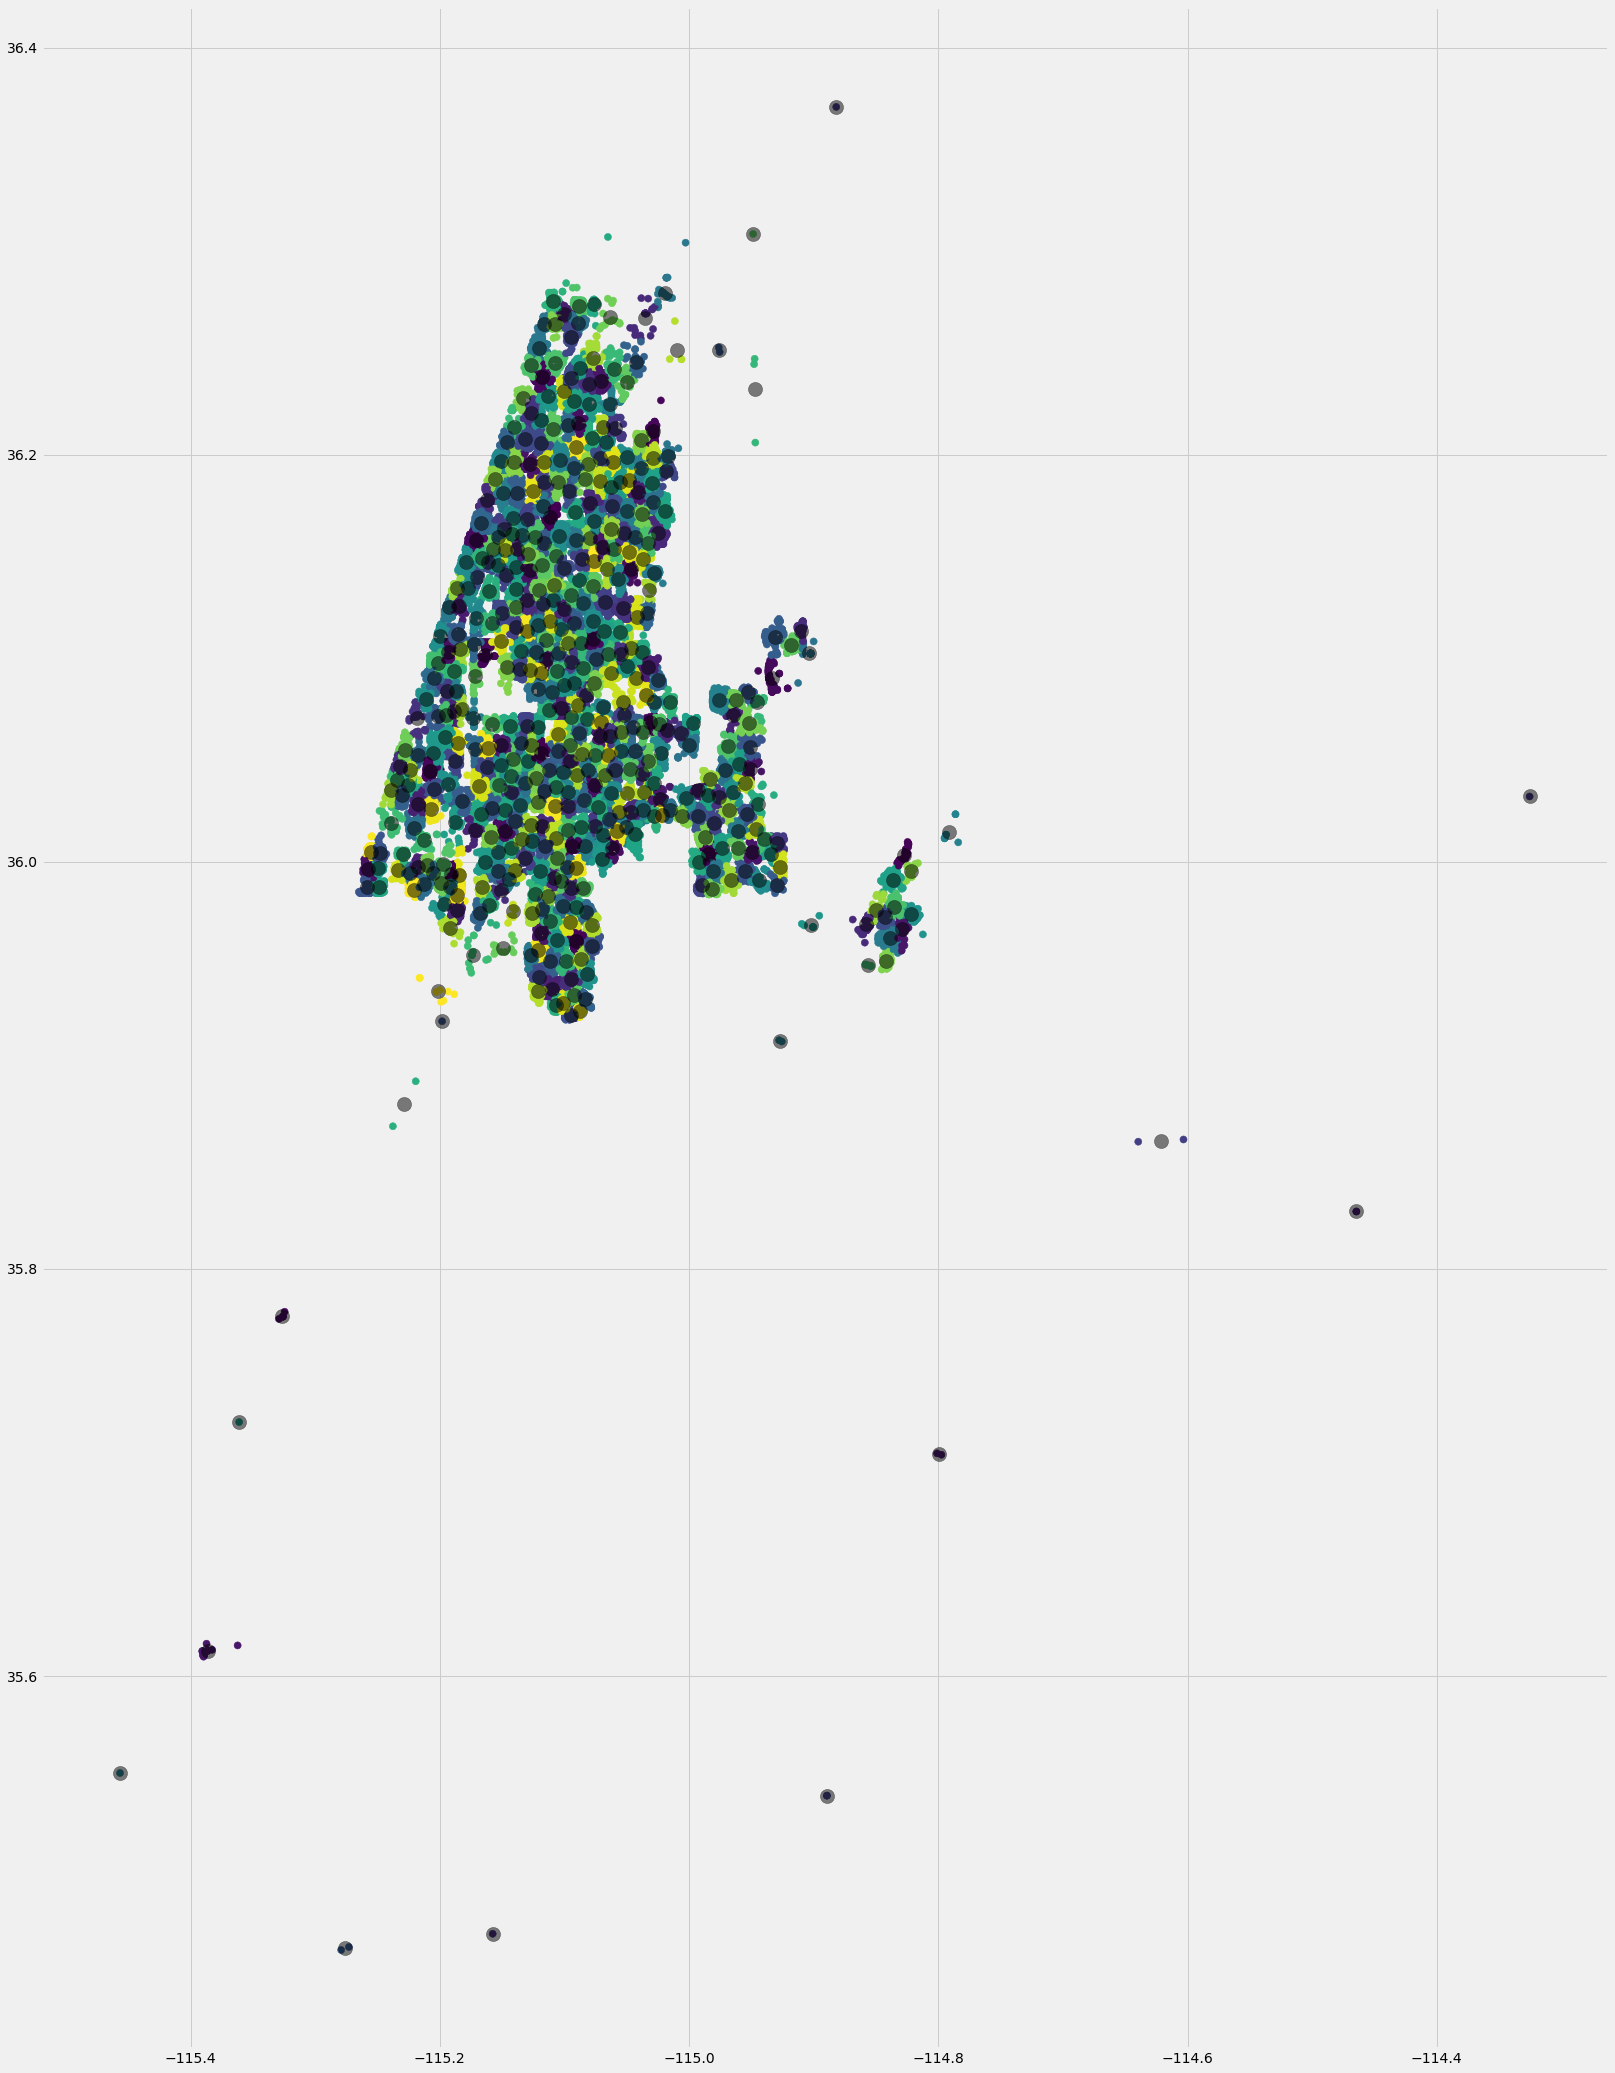

In [46]:
fig, ax = plt.subplots(figsize=[25,35])
plt.scatter(coords[:, 0], coords[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

###  Distance Calculation

In [47]:
from pandas import DataFrame
# cluster centre
Centroid = centers 
Centroid = DataFrame(Centroid, columns = ['LONGITUDE','LATITUDE'])

In [48]:
Centroid.head()

,LONGITUDE,LATITUDE
0,-115.118671,36.053331
1,-115.111690,36.169502
2,-114.984585,36.003946
3,-115.191312,35.993781
4,-115.091026,35.961118


In [49]:
# Distance Calculation
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km



dist_centre['dist'] = \
    haversine_np(Centroid.LONGITUDE.shift(), Centroid.LATITUDE.shift(),
                 Centroid.loc[1:, 'LONGITUDE'], Centroid.loc[1:, 'LATITUDE'])*1000
dist_centre['dist'].min()

707.3395121960264

In [50]:
dist_centre.nsmallest(10, ['dist'])

,Clust_LON,Clust_LAT,dist
265,-115.079588,36.207947,707.339512
111,-114.621455,35.863041,1159.820089
138,-115.079633,36.173859,1245.095259
244,-115.107968,36.029006,1421.576234
179,-115.108772,36.098860,2280.874447
186,-115.110673,35.968827,2420.548635
182,-115.121069,36.175072,2459.790542
238,-115.139221,36.170570,2489.740794
161,-114.791131,36.014743,2601.459183
236,-115.152354,36.042081,2906.740794
